In [13]:
import MEArec as mr
import MEAutility as mu

In [5]:
# define cell_models folder
cell_folder = '../cell_models/bbp'

# generate templates with default params (n=20)
tempgen = mr.gen_templates(cell_folder, params={'n':20}, templates_folder='../data/templates')

# this will take a few minutes...

Probe randomly set to: Neuronexus-32
Parallel
Starting Thread-0


 L5_NBC_bAC217_1 1 / 13 


Starting Thread-1


 L5_LBC_bAC217_1 2 / 13 


Starting Thread-2


 L5_TTPC2_cADpyr232_1 3 / 13 


Starting Thread-3


 L5_MC_bAC217_1 4 / 13 


Starting Thread-4


 L5_STPC_cADpyr232_1 5 / 13 


Starting Thread-5


 L5_BP_bAC217_1 6 / 13 


Starting Thread-6


 L5_TTPC1_cADpyr232_1 7 / 13 


Starting Thread-7


 L5_BTC_bAC217_1 8 / 13 


Starting Thread-8


 L5_UTPC_cADpyr232_1 9 / 13 


Starting Thread-9


 L5_ChC_cACint209_1 10 / 13 


Starting Thread-10


 L5_NGC_bNAC219_1 11 / 13 


Starting Thread-11


 L5_DBC_bAC217_1 12 / 13 


Starting Thread-12


 L5_SBC_bNAC219_1 13 / 13 


Exiting Thread-7
Exiting Thread-4
Exiting Thread-0
Exiting Thread-11
Exiting Thread-3
Exiting Thread-9
Exiting Thread-1
Exiting Thread-2
Exiting Thread-12
Exiting Thread-6
Exiting Thread-10
Exiting Thread-8
Exiting Thread-5



Simulation time:  166.28858494758606 





In [8]:
recgen = mr.gen_recordings(tempgen=tempgen, recording_folder='../data/recordings')

'recording_folder' not specified: using cwd
{'cell_types': {},
 'recordings': {'chunk_duration': 0,
                'cutoff': [300.0, 6000.0],
                'duration': 10.0,
                'electrode_name': 'Neuronexus-32',
                'filter': True,
                'fs': 32000.0,
                'modulation': 'electrode',
                'mrand': 1,
                'n_neurons': 20,
                'noise_level': 15,
                'noise_mode': 'uncorrelated',
                'overlap': False,
                'recordings': 9928,
                'sdrand': 0.05,
                'seed': 623},
 'spiketrains': {'duration': 10,
                 'f_exc': 5,
                 'f_inh': 15,
                 'min_rate': 0.1,
                 'n_exc': 15,
                 'n_inh': 5,
                 'process': 'poisson',
                 'ref_per': 2,
                 'seed': 935,
                 'st_exc': 1,
                 'st_inh': 3,
                 't_start': 0},
 'templates': {

In [11]:
print(recgen.info)

{'spiketrains': {'seed': 935, 't_start': 0, 'duration': 10, 'min_rate': 0.1, 'ref_per': 2, 'process': 'poisson', 'f_exc': 5, 'f_inh': 15, 'st_exc': 1, 'st_inh': 3, 'n_exc': 15, 'n_inh': 5}, 'templates': {'seed': 7802, 'x_lim': None, 'y_lim': None, 'z_lim': None, 'min_amp': 50, 'min_dist': 25, 'overlap_threshold': 0.8, 'pad_len': [3.0, 3.0], 'n_jitters': 10, 'upsample': 8}, 'recordings': {'recordings': 9928, 'fs': 32000.0, 'noise_level': 15, 'noise_mode': 'uncorrelated', 'filter': True, 'cutoff': [300.0, 6000.0], 'modulation': 'electrode', 'chunk_duration': 0, 'mrand': 1, 'sdrand': 0.05, 'overlap': False, 'seed': 623, 'electrode_name': 'Neuronexus-32', 'duration': 10.0, 'n_neurons': 20}, 'cell_types': {}}


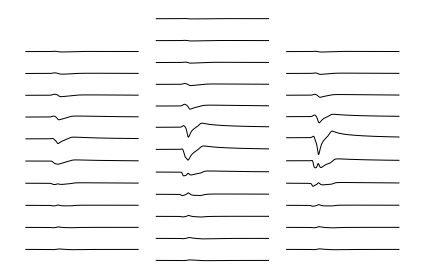

In [16]:
# plot template
probe_name = recgen.info['recordings']['electrode_name']
mea = mu.return_mea(probe_name)

mu.plot_mea_recording(tempgen.templates[0], mea)

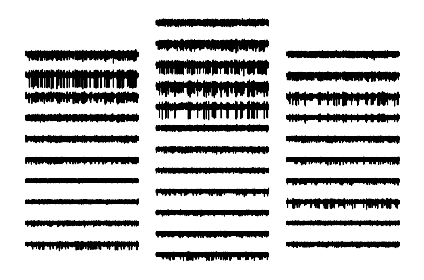

In [17]:
mu.plot_mea_recording(recgen.recordings, mea)